

# Trabajo práctico grupal Nº1 - Parte 2



In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('talk')

Lectura del dataset
En la notebook 00 se explican los detalles de la siguiente sección.



In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [ ]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()
  

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [ ]:
alpha = 0.05

In [ ]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO


# Ejercicio 1: Estimación
Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). ¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

In [ ]:
media_GA=groupA.mean()
desvio_GA=groupA.var()
n_grupoA=groupA.count()


media_GB=groupB.mean()
desvio_GB=groupB.var()
n_grupoB=groupB.count()


print(media_GA,media_GB,desvio_GA,desvio_GB)

101481.62434267918 78219.25094276095 10447968511.734694 3193982222.482429


In [ ]:
estadistico_media_diferencia= media_GA - media_GB

print('estimacion puntual :',estadistico_media_diferencia)

estimacion puntual : 23262.37339991823


In [ ]:
#prueba t de welch
desvio_estandar=np.sqrt((desvio_GA/n_grupoA)+(desvio_GB/n_grupoB)) 
t=estadistico_media_diferencia/desvio_estandar
print('estadistico t :',t)
print('desvio estandar de las dos muestras :',desvio_estandar)

estadistico t : 9.697205976350695
desvio estandar de las dos muestras : 2398.8738051609844


In [ ]:
#grados de libertad
A=np.power(((desvio_GA/n_grupoA)+(desvio_GB/n_grupoB)),2)
B=np.power((desvio_GA/n_grupoA),2)/(n_grupoA-1) 
C=np.power((desvio_GB/n_grupoB),2)/(n_grupoB-1)

v=A/(B+C)
print(v)

2148.0505828160885


In [ ]:
t_alfa2_v=1.96 #segun tabla de t student _ t de alfa/2=0.025 con grados de libertad infinitos

la curva t se comporta igual a la curva z cuando  los 

---

grados de libertad son infinitos por lo tanto es lo mismo usar z de alfa/2 que el t_alfa2_v

In [ ]:
estadistico_media_liminf = estadistico_media_diferencia - t_alfa2_v * (desvio_estandar)

estadistico_media_limsup = estadistico_media_diferencia + t_alfa2_v * (desvio_estandar)

print('Intervalo de confianza del 95%','(',estadistico_media_limsup,'a',estadistico_media_liminf,')')
print('')

Intervalo de confianza del 95% ( 27964.16605803376 a 18560.5807418027 )



el intervalo de confianza se relaciona con el test de hipotesis  dando  la region de aceptacion , en este casi la hipotesis nula es h0=23262 y ha~=23262 por lo tanto se usa o intervalo de confianza doble, tanto inf como sup por lo que el alfa para cada intervalo se divide en 2

# Ejercicio 2: Test de hipótesis


**2.1 Formalización**

*Describir formalmente los distintos compenentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A (hombres) y B (mujeres- otros).*

> Para llevar a cabo esta consigna, implementaremos el Test Kolmogorov–Smirnov, en donde Ho es la Hipótesis Nula.

> **Ho** = Las distribuciones de salarios de ambos grupos son iguales.

> **Estadístico**: distancia Kolmogorov–Smirnov (K-S)

> **JUSTIFICACION DEL TEST Y ESTADISTICO ELEGIDO**


**Test Kolmogorov–Smirnov (K-S)**

La prueba de Kolmogorov–Smirnoff (K-S) es un contraste no paramétrico que tiene como objetivo determinar si la frecuencia de dos conjuntos de datos distintos siguen la misma distribución alrededor de su media.

Este test nos permite determinar si una misma variable se distribuye de la misma forma en dos grupos. En este caso queremos ver como se
distribuye el salario neto en dos grupos según el género.

Existen muchas estrategias  para ver si las muestras son similares o no, y para eso se comparan diferentes tipos de estadísticos. Estos pueden referirse a la centralidad, o la dispersión. Hay que tener precaución porque por ejemplo, dos distribuciones muy distintas pueden tener la misma media.

En el caso del test KS trata de cuantificar la "distancia" entre distribuciones, aqui tiene en cuenta las diferencias en la localización como en la forma de la distribución. Por eso lo elegimos para nuestro análisis.

El estadístico que usaremos se lo denomina **k-s**, también conocido como distancia Kolmogorov–Smirnov (K-S), y se define como la distancia vertical máxima entre las funciones de distribución acumulada empíricas de dos muestras. Luego  se compara el valor obtenido con un valor critico para rechazar o no Ho.



**2.2 P-valor**

*Calcule el p-valor y decida si rechazar o no la hipótesis nula.
Interprete el resultado.
Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al tests?*



> Desarrollamos el test K-S para proporcionar el valor del estadistico *ks* y el *p-value*

In [ ]:
# Importamos las librerias que vamos a usar 
import io
# Gráficos
import matplotlib
import matplotlib.pyplot as plt
import seaborn
# Tratamiento de datos
import numpy as np
import pandas as pd
from math import sqrt
# Modelado y test estadísticos
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ks_2samp

seaborn.set_context('talk')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Visualizamos los datos y vemos las primeras 3 filas
# ==============================================================================
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)
df['salary_monthly_NETO'] = df['salary_monthly_NETO']
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
# Agrupamos para ver los estadisticos por grupos teniendo en cuenta el género y salario
# ==============================================================================
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [ ]:
# Cortamos la muestra para sacarnos de encima errores de número nulos o bajos que no representan en ningún
# caso el salario bajo estudio, dejando  afuera 177 lineas.
# ============================================================================== 
df[df.salary_monthly_NETO > 18900]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4755.0  102613.438074  102355.611344  19000.0   
Mujer                        848.0   78487.326167   54865.094510  20000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          56475.0  81000.0  110000.0  2080000.0  
Mujer           49000.0  68000.0   94000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [ ]:
# Dividimos la muestra en dos grupos, con hombres y sin hombres
# ==============================================================================
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 10000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 10000) & ~is_man].salary_monthly_NETO
groupA

1        63000.0
3       102000.0
4       106000.0
5        44000.0
6        62400.0
          ...   
6088     56450.0
6089    130000.0
6090     97000.0
6091     71000.0
6094     65000.0
Name: salary_monthly_NETO, Length: 4794, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


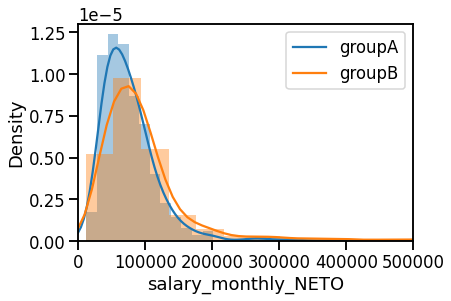

In [ ]:
# Graficamos las distribuciones de cada muestra
# ==============================================================================
seaborn.distplot(groupB, label='groupB')
seaborn.distplot(groupA, label='groupA')
plt.xlim(0, 500000)
plt.legend(["groupA", "groupB"])

**Función de distribución acumulada empírica**

Para calcular el estadistico **ks** debemos graficar la distribución acumulada de cada muestra y ver su *distancia maxima vertica*l,  también denominada como *D*. El método *ECDF()* de la librería *statsmodels* permite ajustar la función de distribución acumulada empírica a partir de una muestra. El resultado de esta función es un objeto ecdf que se comporta de forma similar a un modelo predictivo, recibe un vector de observaciones y devuelve su probabilidad acumulada estimada.

In [ ]:
# Ajuste de las funciones ecdf con cada muestra
# ECDF: Empirical Distribution Function: An empirical distribution function 
# provides a way to model and sample cumulative probabilities for a data sample 
# that does not fit a standard probability distribution
# ==============================================================================
ecdf_MujerOtro = ECDF(groupB)
ecdf_Hombre = ECDF(groupA)

# Estimación de la probabilidad acumulada de cada valor de salario observado
# ==============================================================================
grid_salary_monthly_NETO = np.sort(df.salary_monthly_NETO.unique())
prob_acumulada_ecdf_MujerOtro = ecdf_MujerOtro(grid_salary_monthly_NETO)
prob_acumulada_ecdf_Hombre = ecdf_Hombre(grid_salary_monthly_NETO)

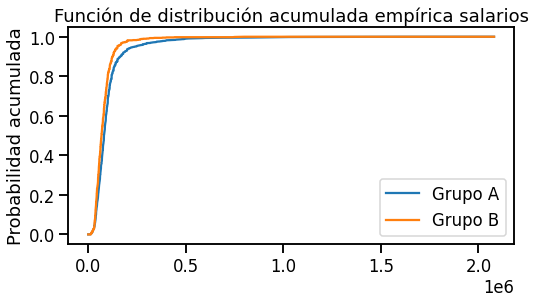

In [ ]:
# Representación gráfica de las curvas ecdf
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax.plot(grid_salary_monthly_NETO, prob_acumulada_ecdf_Hombre, label='Grupo A')
ax.plot(grid_salary_monthly_NETO, prob_acumulada_ecdf_MujerOtro, label='Grupo B')

ax.set_title("Función de distribución acumulada empírica salarios")
ax.set_ylabel("Probabilidad acumulada")
ax.legend();

In [ ]:
# Calculo del estadístico Distancia Kolmogorov–Smirnov
# ==============================================================================
abs_dif = np.abs(prob_acumulada_ecdf_Hombre - prob_acumulada_ecdf_MujerOtro)
distancia_ks = np.max(abs_dif)
print(f"Distancia Kolmogorov–Smirnov: {distancia_ks :.4f}")

Distancia Kolmogorov–Smirnov: 0.1465


In [ ]:
#Empleando los mismos datos del ejemplo anterior se aplica el test de Kolmogorov–Smirnov
# Test Kolmogorov–Smirnov entre dos muestras que también proporciona el valor de p-value
# 
# ==============================================================================
ks_2samp(groupA, groupB)
#este test ks de 2 *samples* devuelven el estadístico ks, es decir D, y p-value

Ks_2sampResult(statistic=0.14651223634062352, pvalue=2.3531960145315565e-14)

## Resultados e interpretaciones

Una vez obtenidos los valores del estadístico **ks = 0.15** y de **p = 2.35e-14** procedemos a comparar con otros valores para rechazar o no la hipotesis nula. Usar ambas comparaciones nos dá mas certeza para rechazar o no Ho.

**Valor crítico**

El cálculo del valor crítico (VC) es indispensable, éste se lo compara con el estadístico *ks*  para aplicar la prueba de rechazo.
Para muestras grandes existe la aproximación al valor crítico para el estadistico *ks* que depende del nivel de significación (%).

Sea el nivel de significancia del 5%, es decir **α=0,05**, procedemos a calcular el valor critico **VC_α** que depende del número de cada muestra y del valor tabulado vcα el cual está tabulado de acuerdo al valor de **α**. Ver tabla en: https://www.webdepot.umontreal.ca/Usagers/angers/MonDepotPublic/STT3500H10/Critical_KS.pdf

Para **α = 0,05** el valor tabulado es **vcα = 1,36**.

Calculamos ahora valor critico **VC_α = vcα\sqrt((n1 + n2) / n1 * n2)**


Usando:
*   n1 = 4494 - cantidad entradas del grupo A (hombre)
*   n2 = 885 - cantidad entradas del grupo B (mujer/otros)

Obtenemos
*   VC_α = 0,05


**********
**Regla de rechazo**

*    Si ks > VC_α entonces Rechazamos Ho.

*   Si ks < VC_α entonces no tenemos suficiente prueba significativa para rechazar Ho.


**ks = 0,15 > VC_α = 0,05** => rechazamos la hipótesis nula **Ho**.

Además **p = 3,36e-16 < 0,05** este valor de **p** nos dice que la probabilidad de que ambas distribuciones provengan de una misma muestra es del orden de **10e-14**

**Esto significa que las distribuciones de salarios de ambos grupos NO son iguales.**


Ambas muestras son grandes y de diferentes tamaños, pero el ser diferentes no afecta el resultado. 

Respecto a la distribución de salarios de los grupos A y B, recién se presentó el test ks donde se rechaza la hipotesis nula, en donde

Ho = Las distribuciones de salarios de ambos grupos son iguales.

> Ahora podemos analizar una hipotesis sobre el promedio usando el Test de Welch.

## Prueba t de Welch

Esta prueba asume que las poblaciones tienen varianzas distintas.

La nueva hipótesis nula es la siguiente:

**Ho**: las dos muestras A y B tienen valores promedio iguales (son independientes). 

In [ ]:
from scipy import stats

In [ ]:
stats.ttest_ind(groupA,groupB, equal_var=False)

Ttest_indResult(statistic=9.654058483329026, pvalue=1.295795770052478e-21)


Dado el **pvalor** menor a **alfa** de 0.05/2 (al ser bilateral) RECHAZO la Hipétesis Nula.

CONCLUSION: el hipótesis nula es rechazada tanto usando el test ks como el test de Welch.